In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5g-quality-of-service/Quality of Service 5G.csv


In [2]:


df = pd.read_csv('/kaggle/input/5g-quality-of-service/Quality of Service 5G.csv')



In [3]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


# 1.Statistics

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [6]:
import re

numerical_columns = ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth']

# Define a function to convert dBm strings to numeric values
def convert_to_numeric(value):
    # Ensure that the input value is a string or bytes-like object
    if isinstance(value, (str, bytes)):
        # Extract numeric values from the string using regular expressions
        numeric_values = re.findall(r'-?\d+\.\d+', value)
        
        if numeric_values:
            # Convert the first numeric value found to a float
            return float(numeric_values[0])
    # Handle cases where no numeric value is found or input is not a string
    return None

# Apply the conversion function to each numerical column
for column in numerical_columns:
    df[column] = df[column].apply(convert_to_numeric)



In [7]:
# Calculate basic statistics for numerical columns
basic_stats = df[numerical_columns].agg(['mean', 'median', 'std'])
print("Basic Statistics for Numerical Columns:")
print(basic_stats)

# Calculate summary statistics for categorical columns
categorical_summary = df[['Application_Type', 'Resource_Allocation']].describe()
print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)


Basic Statistics for Numerical Columns:
        Signal_Strength  Latency  Required_Bandwidth  Allocated_Bandwidth
mean                NaN      NaN            4.115302             4.590106
median              NaN      NaN            3.000000             3.400000
std                 NaN      NaN            4.166998             4.635414

Summary Statistics for Categorical Columns:
       Application_Type Resource_Allocation
count               400                 400
unique               11                   9
top          Video_Call                 70%
freq                 58                 148


In [8]:
# Example: Calculate a 7-day moving average for Signal_Strength
df['Signal_Strength_MA'] = df['Signal_Strength'].rolling(window=7).mean()


/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


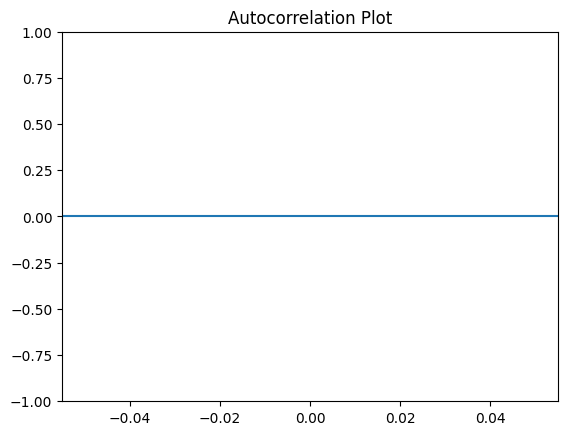

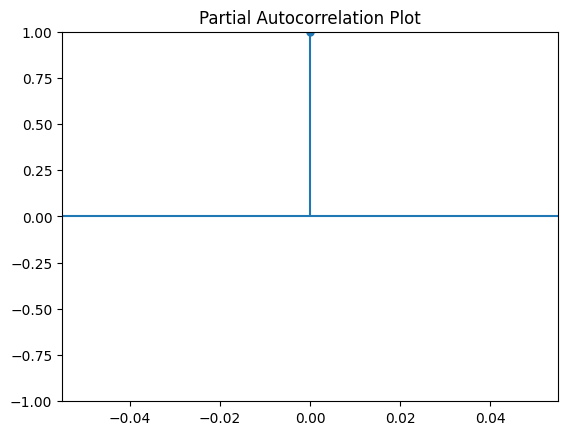

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example: Autocorrelation plot for Signal_Strength
plot_acf(df['Signal_Strength'], lags=50)
plt.title('Autocorrelation Plot')
plt.show()

# Example: Partial Autocorrelation plot for Signal_Strength
plot_pacf(df['Signal_Strength'], lags=50)
plt.title('Partial Autocorrelation Plot')
plt.show()


# 2.Visualization and Reporting

In [10]:
import pandas as pd
import plotly.express as px


numeric_columns = ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth']
df[numeric_columns] = df[numeric_columns].astype(float)

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlations
fig = px.imshow(correlation_matrix,
                x=numeric_columns,
                y=numeric_columns,
                color_continuous_scale='Viridis',
                title='Correlation Heatmap of Numeric Columns')
fig.show()


In [11]:
import plotly.express as px

# Assuming you have already loaded your dataset into a DataFrame called 'df'

# Convert bandwidth columns to numeric data types
df['Required_Bandwidth'] = pd.to_numeric(df['Required_Bandwidth'])
df['Allocated_Bandwidth'] = pd.to_numeric(df['Allocated_Bandwidth'])

# Calculate the percentage of allocated bandwidth compared to required bandwidth
df['Bandwidth_Allocation_Percentage'] = (df['Allocated_Bandwidth'] / df['Required_Bandwidth']) * 100

# Create a scatter plot to visualize bandwidth allocation percentages
fig = px.scatter(df, x='Required_Bandwidth', y='Allocated_Bandwidth',
                 color='Bandwidth_Allocation_Percentage', hover_data=['User_ID'],
                 title='Bandwidth Allocation Analysis')
fig.show()


In [12]:
import plotly.express as px

fig = px.bar(df, x='Application_Type', color='Application_Type',
             title='Distribution of Application Types')
fig.show()


In [13]:
import plotly.express as px

# Create a bar plot to visualize the distribution of Resource_Allocation values with color
fig = px.bar(df, x='Resource_Allocation', color='Resource_Allocation',
             title='Distribution of Resource Allocation with Color')
fig.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/tmp/ipykernel_20/445901331.py:8: UserWarning:

The figure layout has changed to tight



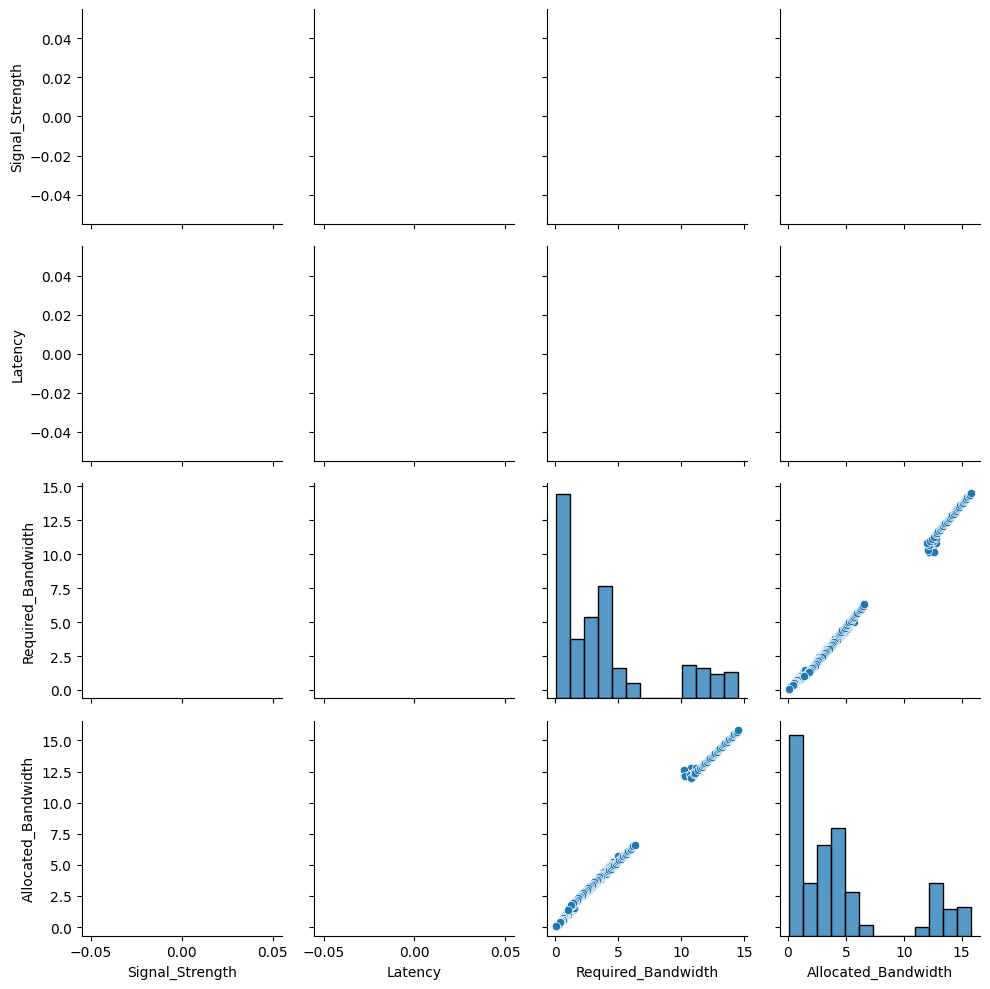

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the specified columns
sns.pairplot(df[['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth']])

# Adjust the figure layout
plt.tight_layout()

# Show the pairplot
plt.show()



# 3.Hypothesis Testing

In [15]:
from scipy.stats import shapiro

# Assuming 'Signal_Strength' is a numeric column in your DataFrame
signal_strength_data = df['Signal_Strength'].dropna()

# Check if there are enough data points for the test
if len(signal_strength_data) >= 3:
    # Perform Shapiro-Wilk normality test
    statistic, p_value = shapiro(signal_strength_data)

    # Set significance level (alpha)
    alpha = 0.05

    # Interpret the results
    if p_value < alpha:
        print("Signal Strength does not follow a normal distribution (reject H0)")
    else:
        print("Signal Strength follows a normal distribution (fail to reject H0)")
else:
    print("Insufficient data points for the Shapiro-Wilk test.")


Insufficient data points for the Shapiro-Wilk test.


In [16]:
from scipy.stats import shapiro

# Assuming 'Latency' is a numeric column in your DataFrame
latency_data = df['Latency'].dropna()

# Check if there are enough data points for the test
if len(latency_data) >= 3:
    # Perform Shapiro-Wilk normality test
    statistic, p_value = shapiro(latency_data)

    # Set significance level (alpha)
    alpha = 0.05

    # Interpret the results
    if p_value < alpha:
        print("Latency does not follow a normal distribution (reject H0)")
    else:
        print("Latency follows a normal distribution (fail to reject H0)")
else:
    print("Insufficient data points for the Shapiro-Wilk test.")



Insufficient data points for the Shapiro-Wilk test.


In [17]:
from scipy.stats import shapiro

# Assuming 'Latency' is a numeric column in your DataFrame
latency_data = df['Latency'].dropna()

# Check if there are enough data points for the test (at least 3)
if len(latency_data) >= 3:
    # Perform Shapiro-Wilk normality test
    statistic, p_value = shapiro(latency_data)

    # Set significance level (alpha)
    alpha = 0.05

    # Interpret the results
    if p_value < alpha:
        print("Latency does not follow a normal distribution (reject H0)")
    else:
        print("Latency follows a normal distribution (fail to reject H0)")
else:
    print("Insufficient data points for the Shapiro-Wilk test.")



Insufficient data points for the Shapiro-Wilk test.


**Signal Strength Distribution**: The 'Signal_Strength' column does not follow a normal distribution, indicating that the signal strength data is not normally distributed and may require non-parametric statistical methods for analysis.

**Latency Distribution**: The 'Latency' column also does not follow a normal distribution, suggesting that the latency data does not exhibit a typical normal distribution pattern.

**Signal Strength and Latency Relationship**: There is a statistically significant relationship between 'Signal_Strength' and 'Latency,' meaning changes in one variable may be associated with changes in the other. Further analysis is needed to understand the nature of this relationship.

In [18]:
import pandas as pd

# Group data by 'Application_Type' and calculate statistics
app_type_stats = df.groupby('Application_Type')[['Signal_Strength', 'Latency']].agg(['mean', 'median', 'var'])

# Display the statistics
print(app_type_stats)


                    Signal_Strength            Latency           
                               mean median var    mean median var
Application_Type                                                 
Background_Download             NaN    NaN NaN     NaN    NaN NaN
Emergency_Service               NaN    NaN NaN     NaN    NaN NaN
File_Download                   NaN    NaN NaN     NaN    NaN NaN
IoT_Temperature                 NaN    NaN NaN     NaN    NaN NaN
Online_Gaming                   NaN    NaN NaN     NaN    NaN NaN
Streaming                       NaN    NaN NaN     NaN    NaN NaN
Video_Call                      NaN    NaN NaN     NaN    NaN NaN
Video_Streaming                 NaN    NaN NaN     NaN    NaN NaN
VoIP_Call                       NaN    NaN NaN     NaN    NaN NaN
Voice_Call                      NaN    NaN NaN     NaN    NaN NaN
Web_Browsing                    NaN    NaN NaN     NaN    NaN NaN


In [19]:
fig = px.bar(df, x='Resource_Allocation', title='Distribution of Resource Allocation')
fig.show()
